# Explore here

In [1]:
import pandas as pd


# Load Bank Marketing Campaign dataset from URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
train_data = df
test_data = df

train_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
import os
#(We can first store the dataset as a flat CSV file, which is easy to share and load.)

# Define the path to store the dataset
output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
df.to_csv(f'{output_dir}/bank-marketing-campaign.csv', index=False)

print(f'Dataset stored as {output_dir}/bank-marketing-campaign.csv')

Dataset stored as data/raw/bank-marketing-campaign.csv


In [4]:
from sqlalchemy import create_engine

# Create an SQLite database (this will create a file called titanic.db)
engine = create_engine('sqlite:///data/bank-marketing-campaign.db')

# Store the dataset in a table called 'titanic_data'
df.to_sql('bank-marketing-campaign', con=engine, if_exists='replace', index=False)

print("Dataset stored in SQLite database as 'Bank Marketing Campaign' table.")

Dataset stored in SQLite database as 'Bank Marketing Campaign' table.


In [5]:
# Number of rows and columns
print(train_data.shape)

(41188, 21)


In [6]:
# Overview of columns, data types, and non-null counts
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Summary statistics for numeric columns
print(train_data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [8]:
# Calculate the total number of missing values for each column
missing_values = train_data.isnull().sum()
print(missing_values)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
# Percentage of missing values
missing_percentages = (train_data.isnull().mean() * 100)
print(missing_percentages)  

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [10]:
# Combine both into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentages})
missing_data


,Missing Values,Percentage
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


In [11]:
# Check for duplicate rows
duplicates = train_data.duplicated().sum()
print(duplicates)

12


In [12]:
#Remove duplicate rows and show new shape 
train_data = train_data.drop_duplicates()
print(f"Shape after removing duplicates: {train_data.shape}")

Shape after removing duplicates: (41176, 21)


In [13]:
#drop unnecessary columns 
#df = df.drop([], axis=1)

In [14]:
# Check certain columns for unique variables
df['poutcome'].nunique()

3

In [15]:
# Check what the unique variables are 
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [16]:
# Check certain columns for unique variables
df['y'].nunique()

2

In [17]:
# Check what the unique variables are 
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
# Check certain columns for unique variables
df['contact'].nunique()

2

In [19]:
# Check what the unique variables are 
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [20]:
# Check certain columns for unique variables
df['month'].nunique()

10

In [21]:
# Check what the unique variables are 
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [22]:
# Check certain columns for unique variables
df['pdays'].nunique()

27

In [23]:
# Check certain columns for unique variables
df['campaign'].nunique()

42

In [24]:
df['previous'].nunique()


8

In [25]:
df['emp.var.rate'].nunique()	

10

In [26]:
# NOT SURE WHICH COLUMNS TO DROP
#drop unnecessary columns 
#df = df.drop(["latitude", "longitude", 'calculated_host_listings_count'], axis=1)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

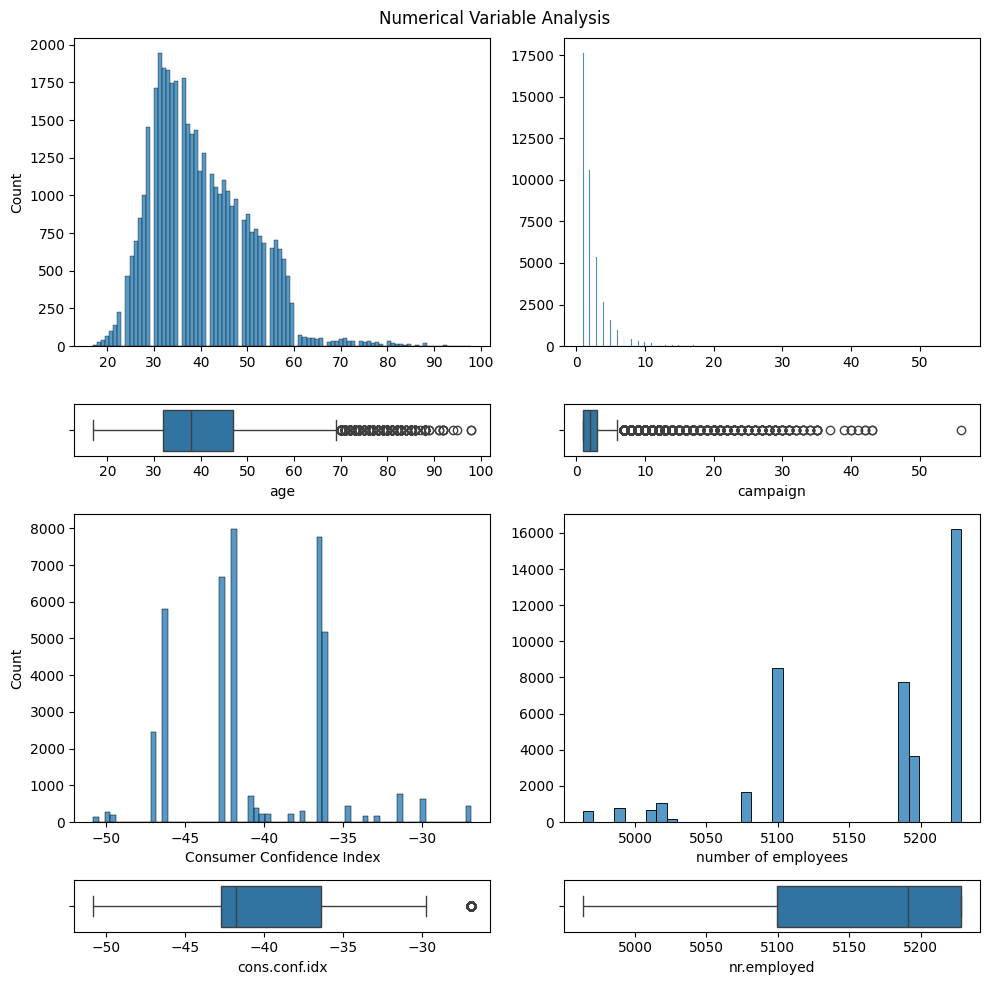

In [28]:
numerical_features = ['age', 'campaign', 'cons.conf.idx', 'nr.employed']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "campaign")
sns.histplot(ax = axis[2, 0], data = df, x = "cons.conf.idx").set(xlabel = 'Consumer Confidence Index')
sns.boxplot(ax = axis[3, 0], data = df, x = "cons.conf.idx")
sns.histplot(ax = axis[2, 1], data = df, x = "nr.employed").set(xlabel = 'number of employees', ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "nr.employed")

plt.suptitle("Numerical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

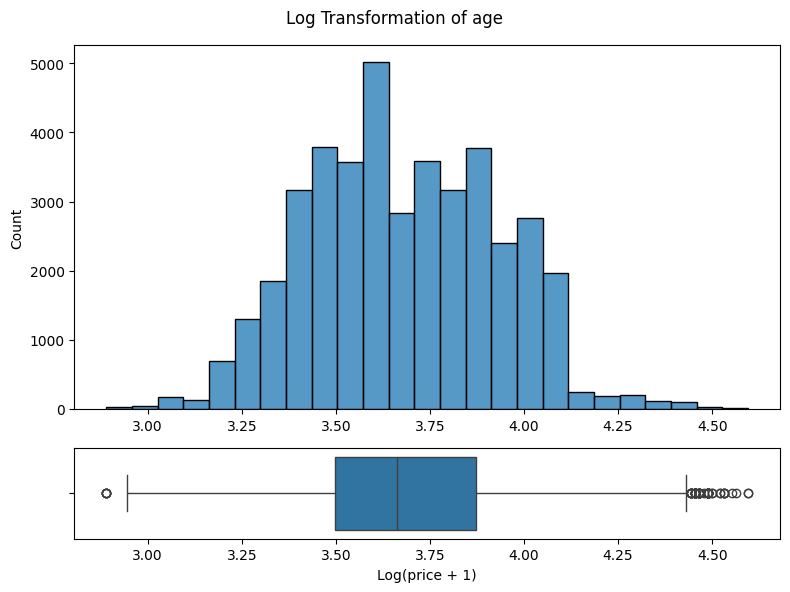

In [33]:
import numpy as np

# Create a figure with 2 subplots: one for the histogram and one for the boxplot
fig, axis = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [4, 1]})

# Apply log transformation to 'Age' using log1p (log(x + 1)) to avoid log(0)
# Plot the log-transformed 'Age' histogram and boxplot
sns.histplot(np.log1p(df['age']), bins=25, ax=axis[0]).set(xlabel = None)
sns.boxplot(x=np.log1p(df['age']), ax=axis[1])
axis[1].set_xlabel('Log(price + 1)')

# Adjust layout and show the plot
plt.suptitle("Log Transformation of age")
plt.tight_layout()
plt.show()

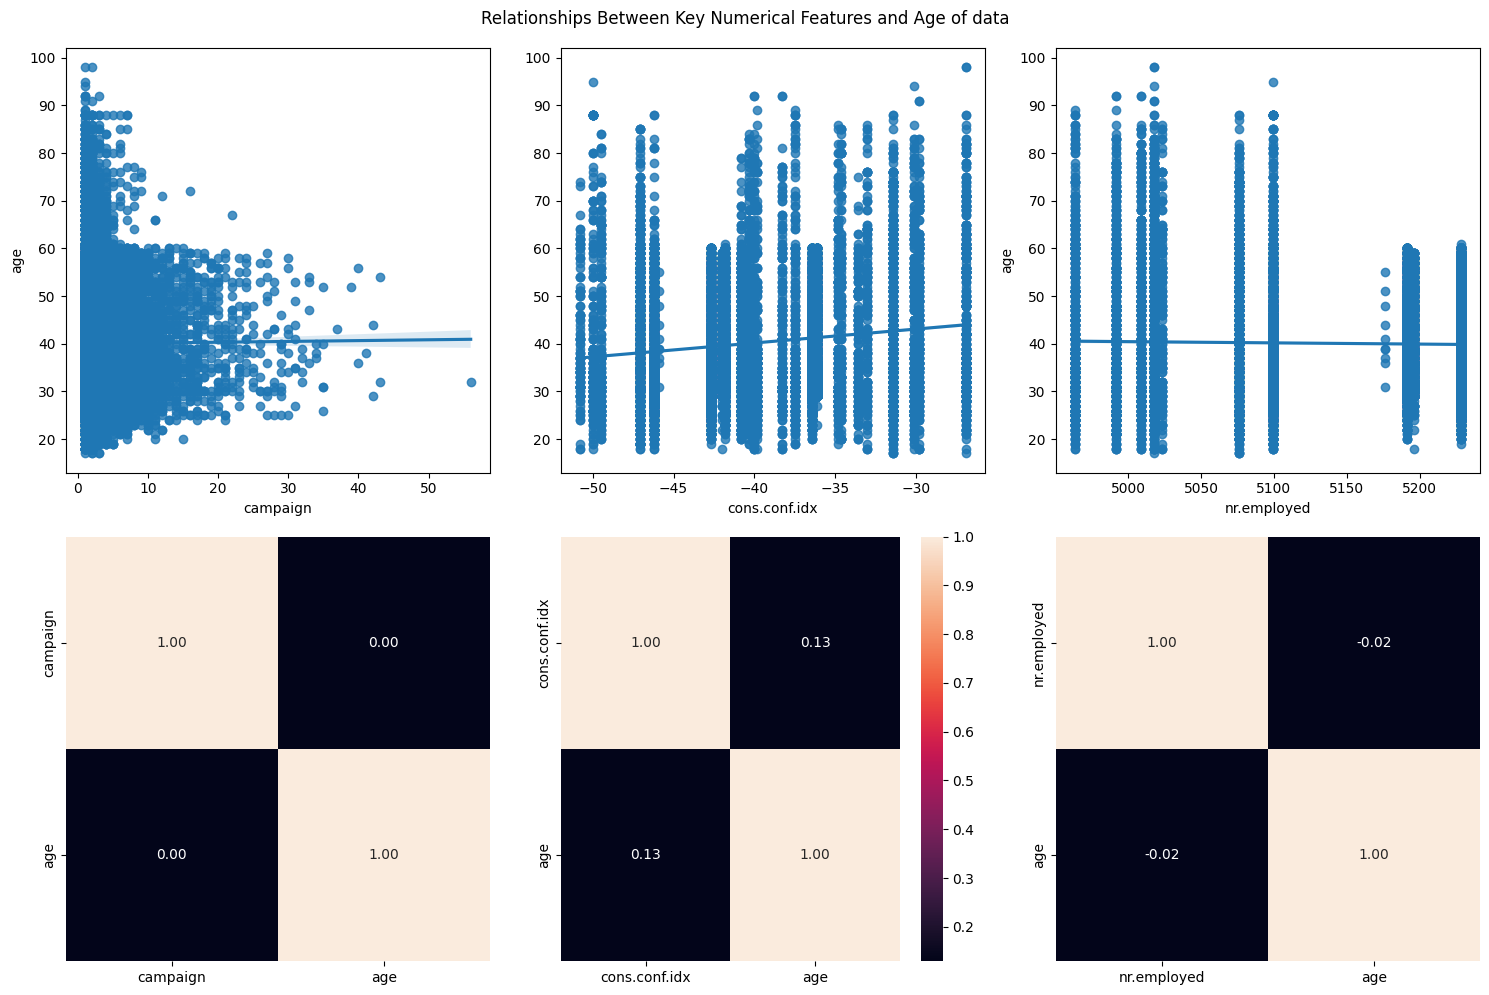

In [35]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "campaign", y = "age")
sns.heatmap(df[["campaign", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "cons.conf.idx", y = "age").set(ylabel=None)
sns.heatmap(df[["cons.conf.idx", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df, x = "nr.employed", y = "age")
sns.heatmap(df[["nr.employed", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar=False)

plt.suptitle("Relationships Between Key Numerical Features and Age of data", y=0.99)
plt.tight_layout()

# Show the plot
plt.show()

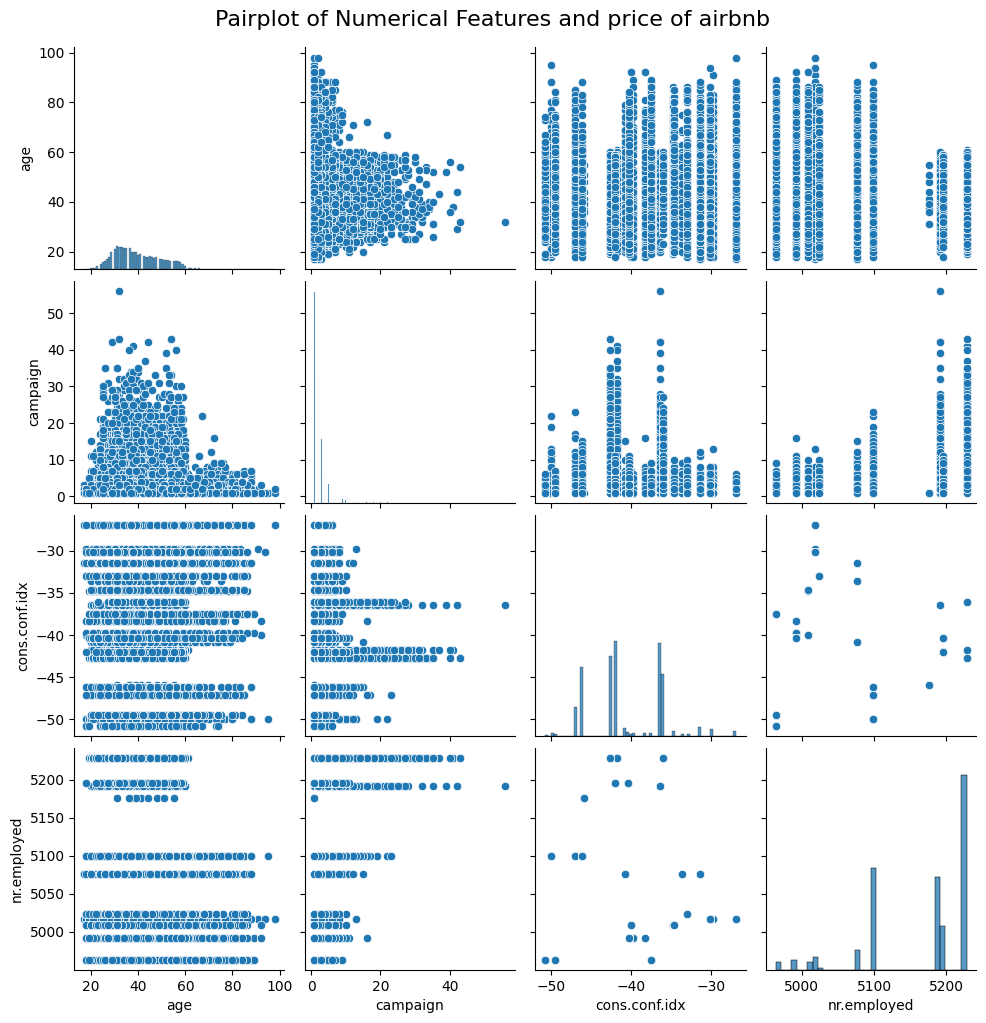

In [ ]:
sns.pairplot(data = df[numerical_features])
plt.suptitle("Pairplot of Numerical Features and bank marketing campaign data", y=1.02, fontsize=16)
plt.show()

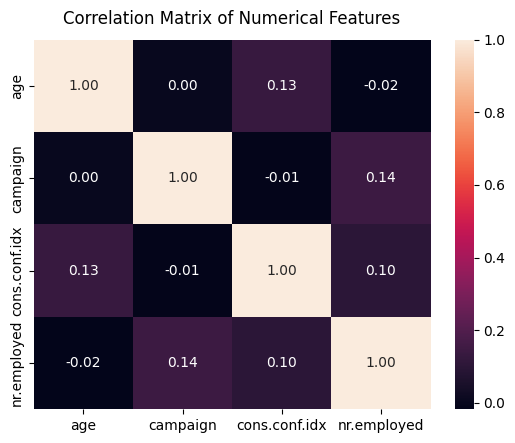

In [37]:
sns.heatmap(df[numerical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features", y=1.02)
plt.show()

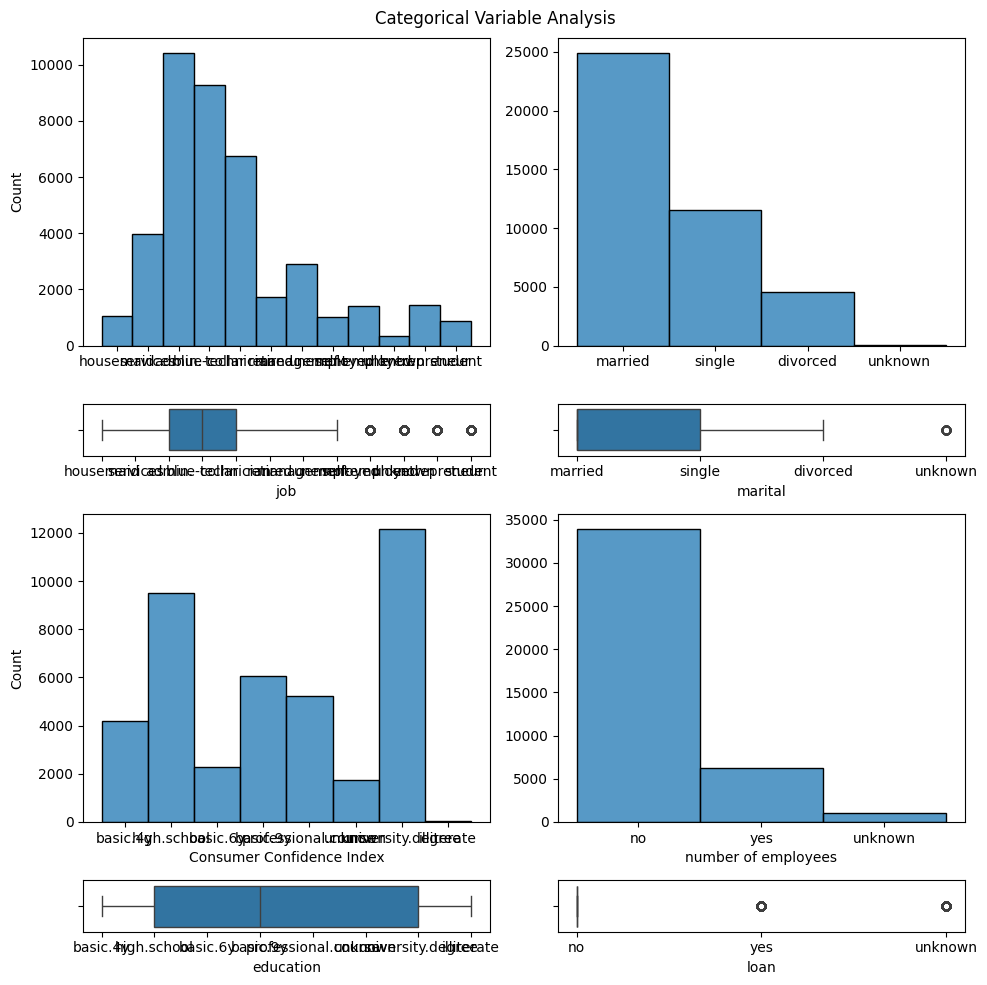

In [31]:
categorical_featuress = ['job', 'marital', 'education', 'loan']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "job").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "job")
sns.histplot(ax = axis[0, 1], data = df, x = "marital").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "marital")
sns.histplot(ax = axis[2, 0], data = df, x = "education").set(xlabel = 'Consumer Confidence Index')
sns.boxplot(ax = axis[3, 0], data = df, x = "education")
sns.histplot(ax = axis[2, 1], data = df, x = "loan").set(xlabel = 'number of employees', ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "loan")

plt.suptitle("Categorical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
# pd.factorize() can factorize categorical features to make them numeric (e.g. {"male": 0, "female": 1})
df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["loan"] = pd.factorize(df["loan"])[0]

In [40]:
# Inspect the original (categorical) feature and the factorized (numeric) feature
df[["job", "job"]]

,job,job
0,0,0
1,1,1
2,1,1
3,2,2
4,1,1
...,...,...
41183,5,5
41184,3,3
41185,5,5
41186,4,4


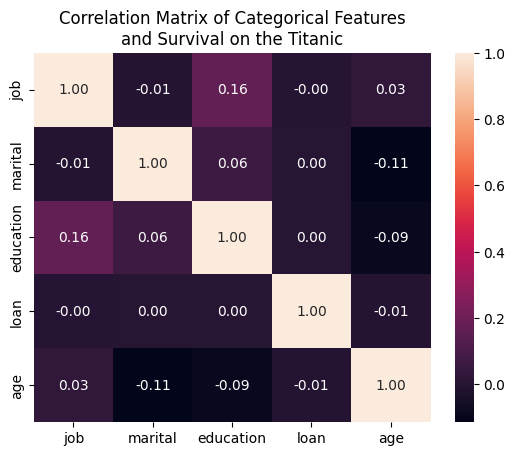

In [42]:
sns.heatmap(df[categorical_features + ['age']].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Categorical Features\nand Survival on the Titanic")
plt.show()

In [43]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['age', 'campaign', 'cons.conf.idx', 'nr.employed']
Categorical features: ['job', 'marital', 'education', 'loan']


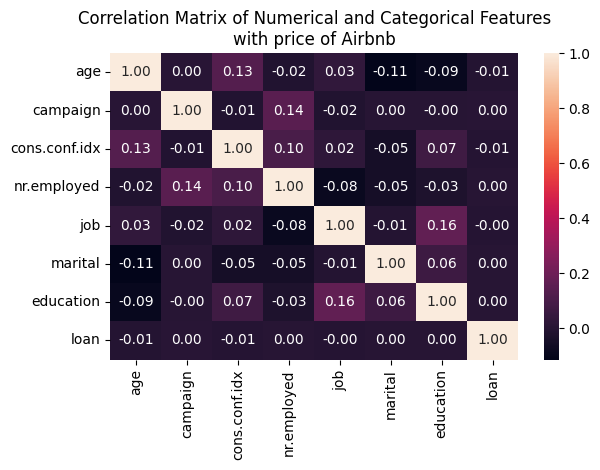

In [44]:
sns.heatmap(df[numerical_features + categorical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical and Categorical Features\nwith price of Airbnb")
plt.tight_layout()

In [45]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']]


,age,job,marital,education,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,40.02406,3.673691,0.510634,3.277532,0.199767,258.28501,2.567593,962.475454,0.172963,0.081886,93.575664,-40.5026,3.621291,5167.035911
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.8000,0.634000,4963.600000
25%,32.00000,2.000000,0.000000,1.000000,0.000000,102.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.7000,1.344000,5099.100000
75%,47.00000,4.000000,1.000000,6.000000,0.000000,319.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.4000,4.961000,5228.100000
max,98.00000,11.000000,3.000000,7.000000,2.000000,4918.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.9000,5.045000,5228.100000


In [48]:
X = df[['campaign', 'cons.conf.idx', 'nr.employed', 'job', 'marital', 'education', 'loan']] # A dataframe (double brackets)


X

,campaign,cons.conf.idx,nr.employed,job,marital,education,loan
0,1,-36.4,5191.0,0,0,0,0
1,1,-36.4,5191.0,1,0,1,0
2,1,-36.4,5191.0,1,0,1,0
3,1,-36.4,5191.0,2,0,2,0
4,1,-36.4,5191.0,1,0,1,1
...,...,...,...,...,...,...,...
41183,1,-50.8,4963.6,5,0,4,0
41184,1,-50.8,4963.6,3,0,4,0
41185,2,-50.8,4963.6,5,0,6,0
41186,1,-50.8,4963.6,4,0,4,0


In [49]:
y = df['age'] # A series (single brackets)

y

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

In [ ]:
# Splitting the data in the train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Split 80% of data is train data

print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Proportion of train set: {X_train.shape[0]} / {df.shape[0]} = {X_train.shape[0]/df.shape[0]:.2f} = {X_train.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 41188
Dimensions of X_train: (32950, 7)
Dimensions of y_train: (32950,)
Proportion of train set: 32950 / 41188 = 0.80 = 80%


In [ ]:
# Split 20% of data is train data

print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_test: {y_test.shape}")
print(f"Proportion of test set: {X_test.shape[0]} / {df.shape[0]} = {X_test.shape[0]/df.shape[0]:.2f} = {X_test.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 41188
Dimensions of X_test: (8238, 7)
Dimensions of y_test: (8238,)
Proportion of test set: 8238 / 41188 = 0.20 = 20%


In [53]:
y_train.describe()

count    32950.000000
mean        39.993414
std         10.409182
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [55]:
scaler.fit(X_train) 

StandardScaler()

In [56]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)    

In [57]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scaled, y_train)    

SelectKBest(k=5)

In [58]:
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])    

In [59]:
# Inspecting X_train_sel (with the five most important features)
X_train_sel 

,cons.conf.idx,nr.employed,job,marital,education
0,0.882233,0.332118,-1.496914,-0.734041,-0.583945
1,-0.324443,0.398388,0.133771,0.698223,0.331312
2,0.882233,0.332118,-0.273901,-0.734041,-0.126317
3,0.882233,0.332118,-0.273901,0.698223,-0.126317
4,-0.324443,0.398388,1.764455,0.698223,1.246568
...,...,...,...,...,...
32945,1.485572,-1.252833,-0.681572,0.698223,-1.041573
32946,-1.229450,-0.936671,0.949113,-0.734041,1.246568
32947,0.882233,0.332118,1.764455,0.698223,1.246568
32948,-0.475278,0.844328,0.541442,-0.734041,-0.126317


In [60]:
dict(zip(X_train.columns,selection_model.scores_))


{'campaign': np.float64(1.5937597161179218),
 'cons.conf.idx': np.float64(14.180153345519066),
 'nr.employed': np.float64(53.76287507628284),
 'job': np.float64(21.629609787193527),
 'marital': np.float64(13.89147393200364),
 'education': np.float64(11.056062842247664),
 'loan': np.float64(1.0937155393576894)}

In [ ]:
# Begin Grid search 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
# Load example data (Iris dataset)
data = load_iris()
X = data.data
y = data.target

In [63]:
# Define the model
model = RandomForestClassifier(random_state=42)

In [66]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]}

In [67]:
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')


In [68]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)   

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [69]:
# Get the best hyperparameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}") 

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.10558421851289834


In [70]:
# Predict using the best model found by GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.11143481427530955


In [72]:
# Define the path to store the dataset
output_dir = 'data/processed'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
X_train_sel.to_csv(f'{output_dir}/bank-marketing-campaign.csv', index=False)
print(f'Dataset stored as {output_dir}/bank-marketing-campaign.csv')

X_test_sel.to_csv(f'{output_dir}/bank-marketing-campaign.csv', index=False)
print(f'Dataset stored as {output_dir}/bank-marketing-campaign.csv')

Dataset stored as data/processed/bank-marketing-campaign.csv
Dataset stored as data/processed/bank-marketing-campaign.csv
